# Week 7 Twitter Analysis
In this notebook, we will be conducting a Twitter data analysis on the perspective people have on CalFresh / SNAP. Since we discovered that the two states with the lowest and highest usage of SNAP were Wyoming and Oregon, we decided to take a deeper look into the largest cities in each state. By scraping data from Twitter, we created word clouds and sentiment analysis charts to understand the perspective that people have towards food stamps / SNAP. 

In [1]:
# the regulars
import pandas as pd
import numpy as np
import plotly.express as px
import osmnx as ox
import matplotlib.pyplot as plt

# to get tweets
import tweepy as tw

# for sentiment analysis
from textblob import TextBlob
import re

# word clouds
from wordcloud import WordCloud, STOPWORDS

## Twitter Keys
For this notebook, we will be using Ethan's set of twitter keys for authentication.

In [2]:
consumer_key= 'A0OqUkDl2C5pRzdGuzCQVV2rz'
consumer_secret= 'hlOBY1NrvS9fHioutdNwdQYcr8hrjf17kWEkTcTiag0kDOzgVM'
access_token= '2451799802-lJnmy2Bc4RSEHGhjhf0jc6WJn0cuevMtUn2RsZb'
access_token_secret= 'neEJsLVlMVE9e7iiRLjnjzLcnyxcszg2s9dqoLgEALtHT'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## Cheyanne, Wyoming
### Tweets by Keyword and Location
We defined our search term as food stamps and filtered out retweets because we only wanted original content. We also set the max tweets as 500.

In [4]:
# search query
searchterm = 'Food Stamps'

# filter out retweets (optional of course)
q = searchterm + " -filter:retweets"

# how many?
max_tweets = 500
 
# Creation of query method using parameters
tweets = tw.Cursor(api.search,
                   q=q, 
                   tweet_mode='extended').items(max_tweets)

We decided to use the search term, "Food Stamps" because 'SNAP' may be used in different ways. Food stamps would give us more relevant data in this case. 

In [5]:
for index, tweet in enumerate(tweets):
    print(index, tweet.full_text)

0 @JosephMOsborne @jeffmcnamee @ImASheeple @djJayTerps @TArchiving @DavMicRot @marcorubio @GOP Thanks! Not many people seem to know this. Welfare is basically the “earned income tax credit” now which requires work. Food Stamps/Medicaid is mostly what’s left of welfare, but everyone seems to think the government is handing out free cash to those without an income.
1 By “welfare state” here, I am not referring to corporate welfare or to subsidies or what have you, but to entitlement programs, redistributive programs, food stamps, Social Security, etc etc etc
2 @RegPlucky @ChrisMurphyCT It’s not taxed.  Cash welfare is a couple hundred a month as long as you meet work search requirements and is limited to two years.  Welfare became the “earned income tax credit” decades ago which requires taxable income (work). The only safety net left is food stamps/Medicaid.
3 @amvetsupport When Trump cut or lowered Food Stamps for those om minimum wage,they didn't care then,At least the Biden can see t

In [6]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='41.161079, -104.805450,50km', 
                   tweet_mode='extended').items(max_tweets)

This isolates the location of our Twitter search to Cheyanne, the most heavily populated city in Wyoming.

In [7]:
print(tweets)

In [8]:
for index, tweet in enumerate(tweets):
    print(str(tweet.created_at) + ': ' + tweet.full_text)

In [9]:
tweets = tw.Cursor(api.search,
                   q=q,
                   tweet_mode='extended').items(max_tweets)

In [10]:
print(tweets)

In [11]:
json_data = [tweet._json for tweet in tweets]

In [12]:
df = pd.json_normalize(json_data)
df.head()

created_at                   id               id_str  \
0  Wed Feb 24 06:44:26 +0000 2021  1364466198180749315  1364466198180749315   
1  Wed Feb 24 06:41:11 +0000 2021  1364465380480098305  1364465380480098305   
2  Wed Feb 24 06:32:14 +0000 2021  1364463127664988161  1364463127664988161   
3  Wed Feb 24 06:29:43 +0000 2021  1364462493473468421  1364462493473468421   
4  Wed Feb 24 06:25:59 +0000 2021  1364461553131560961  1364461553131560961   

                                           full_text  truncated  \
0  @JosephMOsborne @jeffmcnamee @ImASheeple @djJa...      False   
1  By “welfare state” here, I am not referring to...      False   
2  @RegPlucky @ChrisMurphyCT It’s not taxed.  Cas...      False   
3  @amvetsupport When Trump cut or lowered Food S...      False   
4  Ya, because the legal Latino Americans living ...      False   

  display_text_range                                             source  \
0          [93, 363]  <a href="http://twitter.com/download/iphone" r...   
1           [0, 194]  <a href="http://twitter.com/download/iphone" r...   
2          [26, 304]  <a href="http://twitter.com/download/iphone" r...   
3          [14, 265]  <a href="http://twitter.com/download/android" ...   
4           [0, 250]  <a href="http://twitter.com/download/iphone" r...   

   in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0           1.364267e+18       1364267243228565508         4.975086e+08  ...   
1           1.364459e+18       1364458796811124736         9.483131e+17  ...   
2           1.364366e+18       1364366048565202945         8.279201e+17  ...   
3           1.364292e+18       1364292495207636994         7.559466e+17  ...   
4                    NaN                      None                  NaN  ...   

  place.country_code place.country place.contained_within  \
0                NaN           NaN                    NaN   
1                NaN           NaN                    NaN   
2                NaN           NaN                    NaN   
3                NaN           NaN                    NaN   
4                NaN           NaN                    NaN   

  place.bounding_box.type  place.bounding_box.coordinates entities.media  \
0                     NaN                             NaN            NaN   
1                     NaN                             NaN            NaN   
2                     NaN                             NaN            NaN   
3                     NaN                             NaN            NaN   
4                     NaN                             NaN            NaN   

   extended_entities.media  quoted_status.quoted_status_id  \
0                      NaN                             NaN   
1                      NaN                             NaN   
2                      NaN                             NaN   
3                      NaN                             NaN   
4                      NaN                             NaN   

   quoted_status.quoted_status_id_str  quoted_status.scopes.followers  
0                                 NaN                             NaN  
1                                 NaN                             NaN  
2                                 NaN                             NaN  
3                                 NaN                             NaN  
4                                 NaN                             NaN  

[5 rows x 163 columns]

In [13]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 163 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   created_at                                             500 non-null    object 
 1   id                                                     500 non-null    int64  
 2   id_str                                                 500 non-null    object 
 3   full_text                                              500 non-null    object 
 4   truncated                                              500 non-null    bool   
 5   display_text_range                                     500 non-null    object 
 6   source                                                 500 non-null    object 
 7   in_reply_to_status_id                                  302 non-null    float64
 8   in_reply_to_status_id_str                        

In [14]:
df = df[['created_at','full_text','user.screen_name']]

# rename the columns
df.columns = ['created_at','text','screen_name']

In [15]:
pd.set_option('display.max_colwidth', None)

### Word Cloud (Cheyanne, Wyoming)

In [16]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

In [17]:
tweet = df.sample().text.values[0]
print(tweet)
clean_tweet(tweet)

It's  like the people at the grocery store buying beer &amp; cigarettes then getting food with food stamps...ticks me off. https://t.co/cz7esd0QI7


'Its like the people at the grocery store buying beer amp cigarettes then getting food with food stampsticks me off'

In [18]:
df['clean_text'] = ''

In [19]:
for i, row in df.iterrows():
    clean = clean_tweet(row.text)
    df.at[i,'clean_text'] = clean

In [20]:
all_text = ' '.join(df['clean_text'])
all_text

'Thanks Not many people seem to know this Welfare is basically the earned income tax credit now which requires work Food StampsMedicaid is mostly whats left of welfare but everyone seems to think the government is handing out free cash to those without an income By welfare state here I am not referring to corporate welfare or to subsidies or what have you but to entitlement programs redistributive programs food stamps Social Security etc etc etc Its not taxed Cash welfare is a couple hundred a month as long as you meet work search requirements and is limited to two years Welfare became the earned income tax credit decades ago which requires taxable income work The only safety net left is food stampsMedicaid When Trump cut or lowered Food Stamps for those om minimum wagethey didnt care thenAt least the Biden can see thisare tryin to give Americans basicrentfoodUtilities without beggingRichest Country on earthwe have 40M people goin WOdamn shame Ya because the legal Latino Americans livi

In [21]:
stop=list(STOPWORDS)
stop

["we'd",
 'these',
 "aren't",
 'its',
 'where',
 'before',
 'and',
 'such',
 'themselves',
 "isn't",
 'yourself',
 'when',
 'same',
 'over',
 'be',
 'below',
 'further',
 'they',
 "shan't",
 "you're",
 'at',
 'our',
 'above',
 'few',
 'do',
 'how',
 'should',
 "there's",
 'off',
 'are',
 "what's",
 "who's",
 "you'll",
 'http',
 'yourselves',
 'between',
 'own',
 'to',
 'else',
 'all',
 'out',
 'you',
 "we've",
 'again',
 'did',
 'a',
 "hadn't",
 'i',
 'after',
 'because',
 "i'm",
 'this',
 'myself',
 'nor',
 'can',
 'yours',
 'so',
 'more',
 'have',
 'otherwise',
 'theirs',
 'for',
 'she',
 'has',
 "didn't",
 "he's",
 "here's",
 'then',
 'does',
 'down',
 'whom',
 'them',
 'which',
 'from',
 'were',
 'no',
 "he'd",
 "hasn't",
 'an',
 "you've",
 'himself',
 'the',
 'most',
 "shouldn't",
 'he',
 'been',
 "they're",
 'by',
 'we',
 "they'd",
 'com',
 'like',
 'until',
 'there',
 'those',
 "we're",
 'since',
 "can't",
 'his',
 'that',
 "haven't",
 "couldn't",
 "you'd",
 'hers',
 "he'll",
 '

In [22]:
stop.append('food')
stop.append('stamp')
stop.append('stamps')

In [23]:
stop_words = [searchterm] + list(stop)

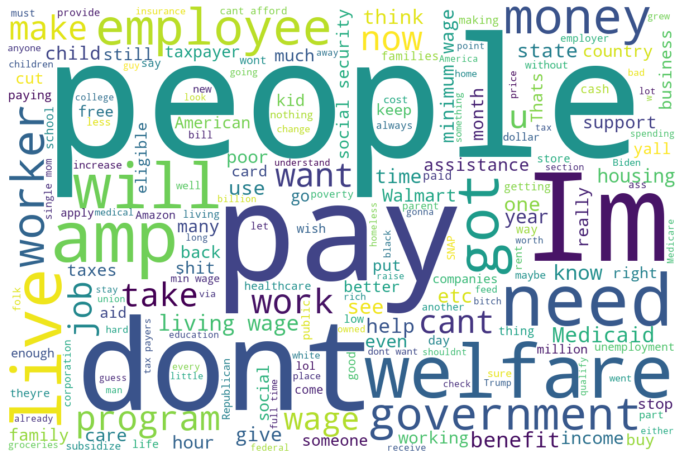

In [24]:
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(all_text)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This word cloud above puts together the words that are most often used in tweets alongside "food stamps". As you can see, it is very people centric because people use this government program the most. Another word that stood out to mee is "need". Food insecurity is such a serious topic and some families truly NEED food stamps to survive. 

### Sentiment Analysis (Cheyanne, Wyoming)

In [25]:
tweet = df.sample().clean_text.values[0]
print(tweet)

# analyze the tweet
a = TextBlob(tweet)

# results
a.sentiment

KaHunaJO Im ready to quit amp collect food stamps amp shit they just did me dirty this year


Sentiment(polarity=-0.19999999999999998, subjectivity=0.7000000000000001)

In [26]:
df['polarity']=''

In [27]:
for i, row in df.iterrows():
    a = TextBlob(row.clean_text)
    df.at[i,'polarity'] = a.polarity

In [28]:
# create a list of our conditions
conditions = [
    (df['polarity'] < -0.2), # very negative
    (df['polarity'] < 0) & (df['polarity'] >= -0.2),   # negative
    (df['polarity'] == 0),  # neutral
    (df['polarity'] > 0) & (df['polarity'] <= 0.2),    # positive
    (df['polarity'] > 0.2)  # very positive
    ]

# create a list of the values we want to assign for each condition
values = [
    'very negative', 
    'negative', 
    'neutral', 
    'positive',
    'very positive'
    ]

# create a new column and use np.select to assign values to it using our lists as arguments
df['sentiment'] = np.select(conditions, values)

In [29]:
sentiment_colors = ox.plot.get_colors(5,cmap='PiYG',return_hex=True)

In [30]:
fig = px.bar(df, 
             x='sentiment',
             width=600,
             title='Sentiment analysis for "'+ searchterm + '"',
             color='sentiment',
             category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
             color_discrete_sequence=sentiment_colors, # use the colors selected in previous cell
            )
# fig.update_traces(textinfo='value')
fig.update_traces(marker_line_width=0) # gets rid of horizontal white lines
fig.show()

This sentiment analysis chart shows that food stamps are generally neutral. This is significant because as a government aid program, it is simply intended to have a positive impact on the community, but it is not neccessarily reflected like that.

### Histogram (Cheyanne, Wyoming)

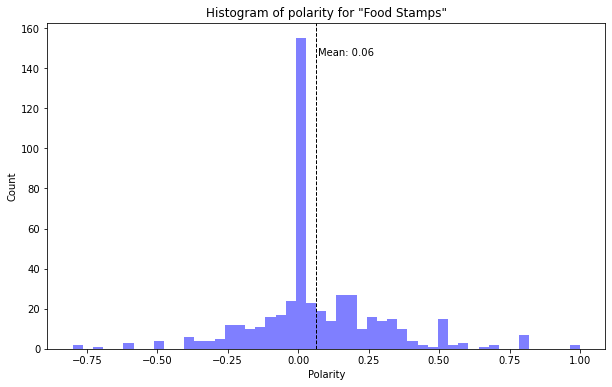

In [31]:
# histogram
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity for "' + searchterm + '"')

plt.axvline(df.polarity.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(df.polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.polarity.mean()))

plt.show();

This histogram shows that the mean polarity for food stamps is slightly postive, however, most tweets were deemed as neutral. Wyoming, the state with the least usage of SNAP, is demonstrating that there is not strong opinion towards food stamps, perhaps because a majority of the population does not rely on it.

## Portland Oregon
### Tweets by Keyword and Location
I defined my search term as food stamps and filtered out retweets because I only wanted original content. I also set the max tweets as 500.

In [32]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='45.5051,-122.6750,50km', 
                   tweet_mode='extended').items(max_tweets)

In [33]:
for index, tweet in enumerate(tweets):
    print(str(tweet.created_at) + ': ' + tweet.full_text)

2021-02-24 05:53:26: @DebHaalandNM YES! As the daughter of a single mother who relied on food stamps at one point, you have my full support. When you have lived experience, you are 100% capable to take on the role...probably the most qualified!
2021-02-24 01:55:09: @DHSgov DemocRATS only give a shit about the votes. Who pays for all these people pouring into the country? They sneak across by the millions, have kids, then WE pay for the healthcare, food stamps, school, etc. We’re drowning in debt as a country.
2021-02-24 01:31:53: The idea, Master Chief is to increase the minimum wage just enough to disqualify them from Food Stamps and other benefits.  They look like heroes to the labor force and demi gods to big business and  Republicans.  There is nothing in their proposal that benefits the working poor https://t.co/2tMu0zei0M
2021-02-23 07:38:07: @RoKhanna Yes. But we shouldn't have to. Employers should pay a living wage. Employees shouldn't have to rely on food stamps, and housing s

### Tweet object (Portland)

In [34]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='45.5051,-122.6750,50km', 
                   tweet_mode='extended').items(max_tweets)

In [35]:
print(tweets)

We convert the json tweet object into a dataframe so we can have easier access to it.

In [36]:
json_data = [tweet._json for tweet in tweets]

In [37]:
df = pd.json_normalize(json_data)
df.head()

created_at                   id               id_str  \
0  Wed Feb 24 05:53:26 +0000 2021  1364453362859610114  1364453362859610114   
1  Wed Feb 24 01:55:09 +0000 2021  1364393397352423425  1364393397352423425   
2  Wed Feb 24 01:31:53 +0000 2021  1364387538819944451  1364387538819944451   
3  Tue Feb 23 07:38:07 +0000 2021  1364117319190941701  1364117319190941701   
4  Tue Feb 23 00:55:05 +0000 2021  1364015892414169088  1364015892414169088   

                                                                                                                                                                                                                                                                                                         full_text  \
0                                                                                  @DebHaalandNM YES! As the daughter of a single mother who relied on food stamps at one point, you have my full support. When you have lived experience, you are 100% capable to take on the role...probably the most qualified!   
1                                                         @DHSgov DemocRATS only give a shit about the votes. Who pays for all these people pouring into the country? They sneak across by the millions, have kids, then WE pay for the healthcare, food stamps, school, etc. We’re drowning in debt as a country.   
2  The idea, Master Chief is to increase the minimum wage just enough to disqualify them from Food Stamps and other benefits.  They look like heroes to the labor force and demi gods to big business and  Republicans.  There is nothing in their proposal that benefits the working poor https://t.co/2tMu0zei0M   
3                                                                                                                                                             @RoKhanna Yes. But we shouldn't have to. Employers should pay a living wage. Employees shouldn't have to rely on food stamps, and housing subsidies.   
4                                                                               #OregonProud, here in Oreon r minimum wage is $12.75, in the metro area is $14, b4 #TrumpVirus we were thriving, paying ppl a living wage is good 4 everyone, food stamps r often given 2 the working poor https://t.co/tfpgWlZi0I   

   truncated display_text_range  \
0      False          [14, 223]   
1      False           [8, 248]   
2      False           [0, 279]   
3      False          [10, 148]   
4      False           [0, 202]   

                                                                                 source  \
0               <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>   
3  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   
4               <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   

   in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0           1.364263e+18       1364262947770363906          286476728.0  ...   
1           1.362933e+18       1362933013370257416           15647676.0  ...   
2                    NaN                      None                  NaN  ...   
3           1.364010e+18       1364009870719090688          771152516.0  ...   
4                    NaN                      None                  NaN  ...   

  place.id place.url place.place_type place.name  place.full_name  \
0      NaN       NaN              NaN        NaN              NaN   
1      NaN       NaN              NaN        NaN              NaN   
2      NaN       NaN              NaN        NaN              NaN   
3      NaN       NaN              NaN        NaN              NaN   
4      NaN       NaN              NaN        NaN              NaN   

  place.country_code  place.count

In [38]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 157 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   created_at                                             28 non-null     object 
 1   id                                                     28 non-null     int64  
 2   id_str                                                 28 non-null     object 
 3   full_text                                              28 non-null     object 
 4   truncated                                              28 non-null     bool   
 5   display_text_range                                     28 non-null     object 
 6   source                                                 28 non-null     object 
 7   in_reply_to_status_id                                  20 non-null     float64
 8   in_reply_to_status_id_str                          

Because there's so many columns, we clean up the data by trimming the columns and renaming them.

In [39]:
# trim the columns
df = df[['created_at','full_text','user.screen_name','user.profile_image_url_https']]

# rename the columns
df.columns = ['created_at','text','screen_name','profile_image']

In [40]:
pd.set_option('display.max_colwidth', None)

In [41]:
df.sample(5)

created_at  \
22  Wed Feb 17 18:21:07 +0000 2021   
19  Wed Feb 17 23:33:34 +0000 2021   
4   Tue Feb 23 00:55:05 +0000 2021   
21  Wed Feb 17 18:54:39 +0000 2021   
14  Thu Feb 18 17:58:54 +0000 2021   

                                                                                                                                                                                                                                                                                           text  \
22  @DeanPreston Actually the market is really really good at building things. subsidizing them is the government's job and these are two separate issues. The market is really good at filling grocery store shelves. We also give people food stamps who don't have enough money to buy food.   
19                           @freckled_frack The horrible part is they nvr gave me benefits when I applied for 15 years even though I've always been below the poverty line. Just when I became disabled and I'm still way below the poverty line. And I only get the food stamps and Medicaid.   
4                                                            #OregonProud, here in Oreon r minimum wage is $12.75, in the metro area is $14, b4 #TrumpVirus we were thriving, paying ppl a living wage is good 4 everyone, food stamps r often given 2 the working poor https://t.co/tfpgWlZi0I   
21                                                                      @pattonoswalt Soooo... my brothers?  Yeah, sounds about right.  They can all huddle and cry together about Rush and their hatred of socialism while using food stamps, and blaming ‘the blacks’ for all their problems.   
14                    @SenSanders @RevDrBarber @RichardTrumka @MaryKayHenry How about looking at retirement.  My mom worked since she was 16 and worked 32 years at a hospital and annualy gets 5000 and some pennies and cant get food stamps because she makes 10's of dollars over the limit   

        screen_name  \
22     ClayShentrup   
19  Courtne84443280   
4   LusciousJewlery   
21  Lemmiwinkidinks   
14         BitGh0st   

                                                                   profile_image  
22  https://pbs.twimg.com/profile_images/1360791425588228096/CcKXM9IA_normal.jpg  
19  https://pbs.twimg.com/profile_images/1345112451616968704/a2-DQMNO_normal.jpg  
4      https://pbs.twimg.com/profile_images/1153685269/gold_wishbone2_normal.jpg  
21  https://pbs.twimg.com/profile_images/429269576778407936/wqlB6h2X_normal.jpeg  
14   https://pbs.twimg.com/profile_images/990319789515026432/ojD28FTk_normal.jpg

In [42]:
# library to display html images
from IPython.display import Image, HTML

# function to convert url to html image
def path_to_image_html(path):
    return '<img src="'+ path + '"/>'

HTML(df.to_html(escape=False ,formatters=dict(profile_image=path_to_image_html)))

### Word Cloud (Portland, Oregon)
I want to display my data in a word cloud, showing words that are higher frequency at larger sizes and less frequent words at smaller sizes. I first clean up the tweets because many tweets have weird characters and emoji's.

In [43]:
# function to clean tweets using regular expressions
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

In [44]:
tweet = df.sample().text.values[0]
print(tweet)
clean_tweet(tweet)

@DanPriceSeattle In Oregon everyone gets paid just enough to barely pay bills but still not qualify for food stamps


'In Oregon everyone gets paid just enough to barely pay bills but still not qualify for food stamps'

In [45]:
df['clean_text'] = ''

In [46]:
for i, row in df.iterrows():
    clean = clean_tweet(row.text)
    df.at[i,'clean_text'] = clean

In [47]:
df.sample(5)[['text','clean_text']]

text  \
27                                                                                                                                                                                                                    @DanPriceSeattle In Oregon everyone gets paid just enough to barely pay bills but still not qualify for food stamps   
6   @AngusMacGyger @SamPfeifle @MattBruenig The ER is legally required to treat you regardless of your ability to pay. They don't like to mention that.\n\nAlso, not the topic.\n\nWhich was how can people on food stamps afford to start businesses and pay for the insurance.\n\nThat's the answer. It's an indictment of our society.   
11                                                                                                                                         @H4N4W4LT All of this! Going from being broke enough to get food stamps to not having to worry about paying rent is actually a huge thing and has helped lessen my day to day anxiety SO much!   
14                                                              @SenSanders @RevDrBarber @RichardTrumka @MaryKayHenry How about looking at retirement.  My mom worked since she was 16 and worked 32 years at a hospital and annualy gets 5000 and some pennies and cant get food stamps because she makes 10's of dollars over the limit   
24                        I did what i could to help some folks out the last couple days. I hope i made a difference. I feel bad for anyone trying to survive. I’ve been there. Back in 2003 i was homeless land so broke I had to share a $1 burrito with my 4 year old once a day until i could get food stamps https://t.co/Dz8sE5SSkB   

                                                                                                                                                                                                                                                                           clean_text  
27                                                                                                                                                                                 In Oregon everyone gets paid just enough to barely pay bills but still not qualify for food stamps  
6             The ER is legally required to treat you regardless of your ability to pay They dont like to mention thatAlso not the topicWhich was how can people on food stamps afford to start businesses and pay for the insuranceThats the answer Its an indictment of our society  
11                                                                                                 All of this Going from being broke enough to get food stamps to not having to worry about paying rent is actually a huge thing and has helped lessen my day to day anxiety SO much  
14                                                                   How about looking at retirement My mom worked since she was 16 and worked 32 years at a hospital and annualy gets 5000 and some pennies and cant get food stamps because she makes 10s of dollars over the limit  
24  I did what i could to help some folks out the last couple days I hope i made a difference I feel bad for anyone trying to survive Ive been there Back in 2003 i was homeless land so broke I had to share a 1 burrito with my 4 year old once a day until i could get food stamps

In [48]:
all_text = ' '.join(df['clean_text'])
all_text

'YES As the daughter of a single mother who relied on food stamps at one point you have my full support When you have lived experience you are 100 capable to take on the roleprobably the most qualified DemocRATS only give a shit about the votes Who pays for all these people pouring into the country They sneak across by the millions have kids then WE pay for the healthcare food stamps school etc Were drowning in debt as a country The idea Master Chief is to increase the minimum wage just enough to disqualify them from Food Stamps and other benefits They look like heroes to the labor force and demi gods to big business and Republicans There is nothing in their proposal that benefits the working poor Yes But we shouldnt have to Employers should pay a living wage Employees shouldnt have to rely on food stamps and housing subsidies OregonProud here in Oreon r minimum wage is 1275 in the metro area is 14 b4 TrumpVirus we were thriving paying ppl a living wage is good 4 everyone food stamps r

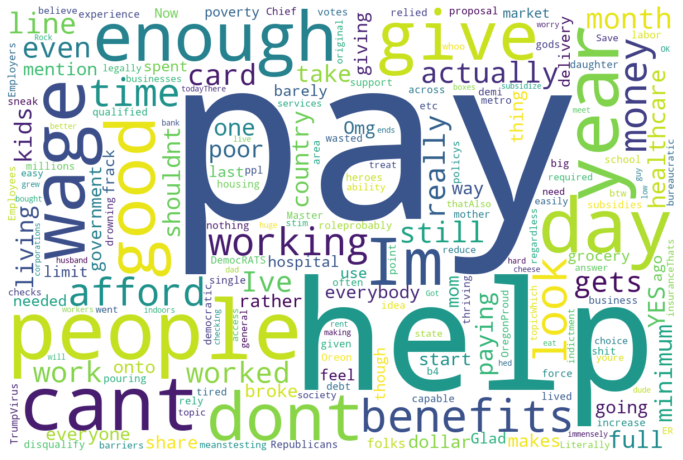

In [49]:
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(all_text)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Sentiment Analysis (Portland, Oregon)
I also run a sentiment analysis so I can figure out if what people are saying is more positive or negative about food stamps.

In [50]:
# get a random tweet
tweet = df.sample().clean_text.values[0]
print(tweet)

# analyze the tweet
a = TextBlob(tweet)

# results
a.sentiment

My mom gets 508532 cents a year being retired Has worked since she was 16 and spent the last 34 years working for a hospital And is just barely over the limit to get food stamps to help her pay for groceries Ive been giving her 20000 a month to help her feel your pain


Sentiment(polarity=-0.016666666666666666, subjectivity=0.0888888888888889)

In [51]:
df['polarity']=''

In [52]:
for i, row in df.iterrows():
    a = TextBlob(row.clean_text)
    df.at[i,'polarity'] = a.polarity

In [53]:
df[['clean_text','polarity']].sample(5)

clean_text  \
26                                                                                                                                          Glad you can be the exception being a social shill helps Im sure looks a little different for a lot of other folks   
4                                                             OregonProud here in Oreon r minimum wage is 1275 in the metro area is 14 b4 TrumpVirus we were thriving paying ppl a living wage is good 4 everyone food stamps r often given 2 the working poor   
9                                                                                                     She cant work but her husband does full time They have to be on food stamps however and have a hard time making ends meet This would help them immensely   
5   so tired of the time and money wasted in democratic policys meanstesting Literally just give everybody food stamps and state healthcare and stim checks Save the bureaucratic money reduce barriers so people whoo need it most can access services easily   
12                                                                                                    That is a fact Period There is more to the hit of all of us when everybody dont pay their own share Not to mention many of them work and get food stamps   

     polarity  
26   0.120139  
4        0.15  
9   0.0194444  
5   0.0833333  
12   0.533333

In [54]:
# create a list of our conditions
conditions = [
    (df['polarity'] < -0.2), # very negative
    (df['polarity'] < 0) & (df['polarity'] >= -0.2),   # negative
    (df['polarity'] == 0),  # neutral
    (df['polarity'] > 0) & (df['polarity'] <= 0.2),    # positive
    (df['polarity'] > 0.2)  # very positive
    ]

# create a list of the values we want to assign for each condition
values = [
    'very negative', 
    'negative', 
    'neutral', 
    'positive',
    'very positive'
    ]

# create a new column and use np.select to assign values to it using our lists as arguments
df['sentiment'] = np.select(conditions, values)

In [55]:
df.sample(5)[['clean_text','polarity','sentiment']]

clean_text  \
13                                                                              Rachel Sennot A star Dianna Agron A feat of casting Polly Drapers reading of the line you look like Gwyneth Paltrow on food stamps and not in a good way Branded onto my brain   
21                                                               Soooo my brothers Yeah sounds about right They can all huddle and cry together about Rush and their hatred of socialism while using food stamps and blaming the blacks for all their problems   
4                                                             OregonProud here in Oreon r minimum wage is 1275 in the metro area is 14 b4 TrumpVirus we were thriving paying ppl a living wage is good 4 everyone food stamps r often given 2 the working poor   
5   so tired of the time and money wasted in democratic policys meanstesting Literally just give everybody food stamps and state healthcare and stim checks Save the bureaucratic money reduce barriers so people whoo need it most can access services easily   
3                                                                                                                          Yes But we shouldnt have to Employers should pay a living wage Employees shouldnt have to rely on food stamps and housing subsidies   

     polarity      sentiment  
13        0.7  very positive  
21   0.285714  very positive  
4        0.15       positive  
5   0.0833333       positive  
3           0        neutral

I create a bar chart to show the sentiment analysis for the word food stamps.

In [56]:
sentiment_colors = ox.plot.get_colors(5,cmap='PiYG',return_hex=True)

In [57]:
# bar chart
fig = px.bar(df, 
             x='sentiment',
             width=600,
             title='Sentiment analysis for "'+ searchterm + '"',
             color='sentiment',
             category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
             color_discrete_sequence=sentiment_colors, # use the colors selected in previous cell
            )
# fig.update_traces(textinfo='value')
fig.update_traces(marker_line_width=0) # gets rid of horizontal white lines
fig.show()

I also make a sentiment histogram that shows where the mean of the sentiment is.

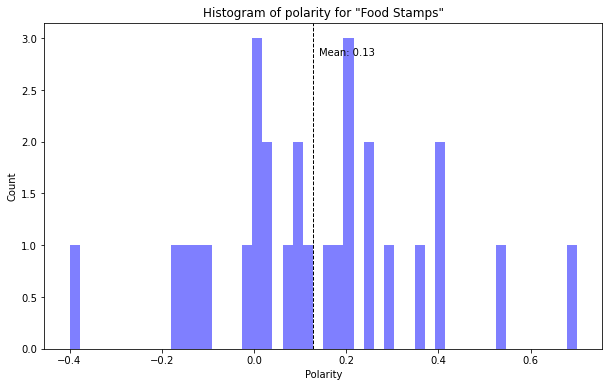

In [58]:
# histogram
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity for "' + searchterm + '"')

plt.axvline(df.polarity.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(df.polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.polarity.mean()))

plt.show();

## Comparisons
There was some interesting results that came from analyzing the data from twitter users in Cheyanne and Portland. We selected these two cities because they are the most highly populated cities in the states that have low and high SNAP usage, respectively. Our intention for comparing these cities was to determine if there was a significant difference in the overall perception that the community has on SNAP/Food Stamps. Portland, a city that has generally high SNAP usage, had a significantly more positive outlook on Food stamps in comparison to Cheyanne. This is reflected when comparing the two Sentiment analysis bar charts and the proportions of the positive and negatives. This is further supported by the higher mean polarity shown in Portland with a mean value of 0.13, whereas Cheyanne has a mean value of 0.06. 

For this assignment, Ethan worked to create the data visualizations in Cheyanne, Wyoming. Stephanie on the otherhand created the data visualizations in Portland, Oregon. After both creating the visalizations, Ethan and Stephanie collaborated to compare the data. Lastly, Ethan compiled all of the information in this singular jupiter notebook. 